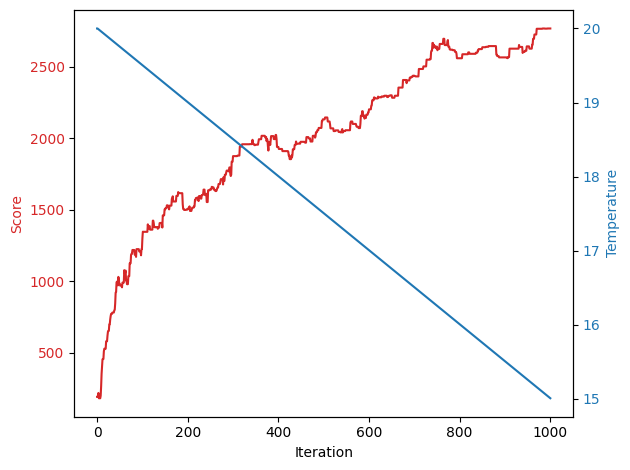

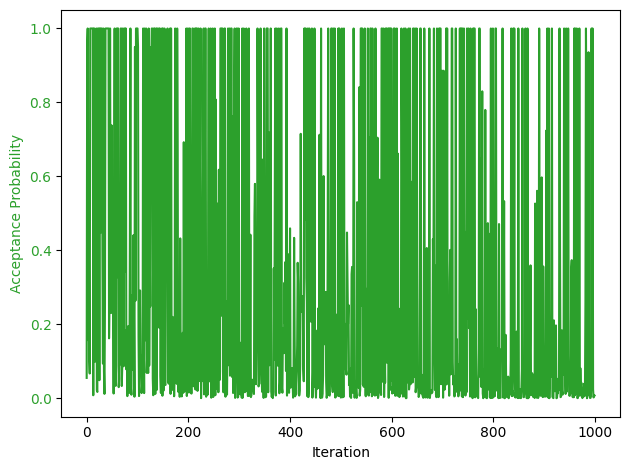

Initial score: 193
Final score: 2767
Table 1: [21, 45, 54, 91, 149]
Table 2: [16, 22, 84, 170, 184]
Table 3: [50, 116, 118, 130, 191]
Table 4: [47, 83, 88, 150, 162]
Table 5: [5, 53, 92, 112, 179]
Table 6: [15, 32, 134, 153, 192]
Table 7: [37, 96, 142, 145, 154]
Table 8: [6, 18, 115, 157, 175]
Table 9: [7, 27, 48, 94, 155]
Table 10: [12, 44, 152, 181, 189]
Table 11: [75, 119, 128, 151, 198]
Table 12: [8, 30, 51, 68, 133]
Table 13: [40, 87, 178, 183, 199]
Table 14: [19, 36, 72, 132, 196]
Table 15: [33, 102, 126, 135, 174]
Table 16: [97, 99, 120, 144, 186]
Table 17: [65, 80, 82, 129, 180]
Table 18: [17, 20, 123, 148, 190]
Table 19: [10, 61, 108, 166, 195]
Table 20: [0, 62, 105, 124, 197]
Table 21: [41, 93, 95, 125, 140]
Table 22: [4, 42, 52, 89, 147]
Table 23: [13, 49, 55, 69, 131]
Table 24: [24, 43, 67, 137, 187]
Table 25: [9, 56, 76, 159, 168]
Table 26: [77, 90, 146, 169, 185]
Table 27: [57, 70, 127, 143, 160]
Table 28: [1, 25, 38, 60, 172]
Table 29: [109, 114, 139, 141, 177]
Table 30:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of guests and tables
NUM_GUESTS = 200
NUM_TABLES = 40
TABLE_SIZE = 5

# Define the guest interest scores
GUEST_SCORES = np.random.randint(-20, 21, size=(NUM_GUESTS, NUM_GUESTS))

# Make scores symmetric
for i in range(NUM_GUESTS):
    for j in range(i + 1, NUM_GUESTS):
        GUEST_SCORES[j, i] = GUEST_SCORES[i, j]

# Set diagonal elements to zero
np.fill_diagonal(GUEST_SCORES, 0)

# Define the initial state
def random_seating_plan():
    seating_plan = np.zeros(NUM_GUESTS, dtype=int)
    for i in range(NUM_TABLES):
        table_indices = np.arange(i * TABLE_SIZE, (i + 1) * TABLE_SIZE)
        seating_plan[table_indices] = i
    np.random.shuffle(seating_plan)
    return seating_plan


# Define the objective function
def same_table(guest1, guest2, seating_plan):
    return seating_plan[guest1] == seating_plan[guest2]

def seating_score(seating_plan):
    score = 0
    for i in range(NUM_GUESTS):
        for j in range(i + 1, NUM_GUESTS):
            if same_table(i, j, seating_plan):
                score += GUEST_SCORES[i, j]
    return score


# Define the simulated annealing algorithm
def simulated_annealing(objective_function, initial_state, temperature_schedule, max_iterations):
    current_state = initial_state
    current_score = objective_function(current_state)
    scores = [current_score]
    temperatures = [temperature_schedule(0)]
    acceptance_probs = []

    for i in range(max_iterations):
        temperature = temperature_schedule(i)
        new_state = current_state.copy()
        swap_indices = np.random.choice(NUM_GUESTS, size=2, replace=False)
        new_state[swap_indices[0]], new_state[swap_indices[1]] = new_state[swap_indices[1]], new_state[swap_indices[0]]
        new_score = objective_function(new_state)

        delta_score = new_score - current_score

        # Calculate the acceptance probability
        if delta_score > 0:
            acceptance_prob = 1.0
        else:
            acceptance_prob = np.exp(delta_score / temperature)

        if acceptance_prob > np.random.uniform():
            current_state = new_state
            current_score = new_score

        scores.append(current_score)
        temperatures.append(temperature)
        acceptance_probs.append(acceptance_prob)

    return current_state, current_score, scores, temperatures, acceptance_probs

# Define the temperature schedule
max_iterations = 1000
def temperature_schedule(iteration):
    return 20.0 - (5.0 * iteration) / max_iterations


# Run simulated annealing
initial_state = random_seating_plan()
final_state, final_score, scores, temperatures, acceptance_probs = simulated_annealing(seating_score, initial_state, temperature_schedule, max_iterations)

# Create separate subplots for scores, temperatures, and acceptance probabilities
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Score', color=color)
ax1.plot(scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)
ax2.plot(temperatures, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

fig, ax3 = plt.subplots()

color = 'tab:green'
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Acceptance Probability', color=color)
ax3.plot(acceptance_probs, color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

plt.show()

# Print the results
#print("Possible solutions: ", (NUM_TABLES ** NUM_GUESTS) // (TABLE_SIZE ** NUM_TABLES))
print("Initial score:", seating_score(initial_state))
print("Final score:", final_score)

# Output final seating plan by table number and guests
final_seating_by_table = [[] for _ in range(NUM_TABLES)]
for guest, table in enumerate(final_state):
    final_seating_by_table[table].append(guest)

for table, guests in enumerate(final_seating_by_table):
    print(f"Table {table+1}: {guests}")